<h2><center>Brazilian Birdwatching and Brazil's Amazon Deforestation</center></h2>

<h3><center>Craig Certo</center></h3>

<img src = "Amazon_Rainforest_birds.jpg">

### Introduction

#### The Amazon Rainforest

The Amazon Rainforest is the world's largest rainforest and river basin on the planet. The Amazon spans 670 million hectares, stores 90-140 billion metric tons of carbon, and supports 34 million people. It has been estimated that the Amazon contains 10% of known species on Earth, over 1300 of which species are birds. The birds in the Amazon account for one third of all bird species in the world. Since birds primarily reside in the treetops, they are highly threatened by deforestation. Birds may discover that the rainforest they flew to last year is seriously damaged or no longer exists. 

Learn more at: https://www.britannica.com/place/Amazon-Rainforest


#### Deforestation in the Amazon

Unfortunately, the Amazon is facing a threat due to unsustainable economic development and over 20% of the Amazon biome has been lost. The Amazon is the biggest deforestation front in the world and the WWF estimates that 27% of the Amazon will be without trees by 2030 if the current rate of deforestation continues. 

If you would like to learn more about deforestation in the Amazon, please pursue information on the WWF webpage: (https://wwf.panda.org/discover/our_focus/forests_practice/deforestation_fronts2/deforestation_in_the_amazon/)

#### Bird Watchers in Brazil

As the Brazilian Amazon hosts an incredible variety of bird species, there are thousands of people who have a passion for these birds and record their observations to share them with the bird watching community. Wikiaves.com is a website and forum for bird watchers in Brazil to post their pictures and observations of birds to have them identified and seen by others. Wikiaves has become a large repository for bird watchers and currently has 36,549 observers, 3,420,606 records, and has identified 1891 species. 

Please visit their website to see fascinating recent images and descriptions of unique birds: (https://www.wikiaves.com).


#### Data Science to Recognize Trends

In this tutorial, I will be utilizing the Data Science lifecycle in an effort to determine if there is an association between the deforestation in the Brazilian Amazon Rainforest and bird watchers in Brazil. Using the activity and records from the Wikaves repository, as well as information about yearly deforestation in the Brazilian Amazon, I will utilize python's useful libraries and data science techniques to discover trends in the data, present interesting patterns, and possibly discover correlations between these two events. In the process, I will go through each step of the data science lifecycle to reach my final conclusions.

### Data Collection

The first step in the Data Science lifecycle is data collection. This is where we will take our data from external sources and import it into our project, either by scraping it from a website or by downloading the dataset onto our personal machine.

For the Wikiaves repository, I am using a Kaggle dataset named "Brazilian Bird Observation Metadata from Wikiaves" which is a dataset scraped from Wikiaves kindly made available by Danilo Lessa Bernardineli. This dataset contains about 3 million observations and 17 attributes, of which I will be using only a few. It is available for download here: (https://www.kaggle.com/danlessa/brazilian-bird-observation-metadata-from-wikiaves)

Data regarding Amazon deforestation will be scraped from Mongabay.com, a webpage dedicated to rainforests and useful information for the public regarding the Amazon. The data is updated monthly, contains and is supplied by Rhett A. Butler. To learn more about deforestation figures I will be using in this tutorial, the data is available here: (https://rainforests.mongabay.com/amazon/deforestation_calculations.html) 

#### Scraping Data

I first must download and import the HTMLTableParser, which will help me in scraping the data from Mongabay.com

In [1]:
pip install html-table-parser-python3

Note: you may need to restart the kernel to use updated packages.


Throughout this tutorial I will be using Pandas for storing and manipulating my data. Find out more about Pandas here: https://pandas.pydata.org/

In [2]:
import urllib.request
from html_table_parser import HTMLTableParser
import pandas as pd



Using the HTMLTable Parser, I read the contents of the webpage and import it into a Pandas Dataframe called "forest". I print the first 5 rows of the table to better understand the columns and attributes for each observation.

In [3]:
# Data Collection
def url_get_contents(url): 
  
    # Send a request to the webpage
    req = urllib.request.Request(url=url,  headers={'User-Agent': 'Mozilla/5.0'}) 
    web = urllib.request.urlopen(req) 
  
    # Read the contents of the webpage
    return web.read() 
  
# Pass our URL into the url_get_contents function 
page = url_get_contents('https://rainforests.mongabay.com/amazon/deforestation_calculations.html').decode('utf-8') 
  
# Defining the HTMLTableParser object 
html = HTMLTableParser() 
  
# Feeding the page contents into the HTMLTableParser
html.feed(page) 

# Convert the table contents into a DataFrame
forest = pd.DataFrame(html.tables[0])
forest.head()

,0,1,2,3,4,5,6
0,,Period,Estimated Natural Forest Cover,Deforestation (INPE),Natural forest cover change,Forest cover as % of pre-1970 cover,Total forest loss since 1970
1,,pre-1970,"4,100,000",,,,
2,,1970,"4,001,600",,,,
3,,1977,"3,955,870",,,,
4,,1985,"3,864,945","21,050",,,


#### Importing Data

After scraping the deforestation data, I will now import the Wikiaves.com dataset.

As I have already downloaded the Wikiaves dataset, I will simply use Pandas read_csv feature to import the data into my datatable called "bird_observations". I will print the datatable to further understand it's attributes as well.

In [4]:
bird_observations = pd.read_csv("bird_observations.csv")
bird_observations.head()

,Unnamed: 0,author_id,registry_id,comment_count,registry_date,is_large,location_id,is_flagged,like_count,registry_link,location_name,views_count,home_location_id,species_id,scientific_species_name,popular_species_name,species_wiki_slug
0,0,1.0,173.0,0.0,2008-02-03,0.0,3202801,0.0,2.0,https://s3.amazonaws.com/media.wikiaves.com.br...,Itapemirim/ES,725.0,3136702,10530.0,Athene cunicularia,coruja-buraqueira,coruja-buraqueira
1,1,1.0,3033917.0,1.0,2008-06-14,1.0,3302254,0.0,3.0,https://s3.amazonaws.com/media.wikiaves.com.br...,Itatiaia/RJ,45.0,3136702,11629.0,Zonotrichia capensis,tico-tico,tico-tico
2,2,1.0,3033916.0,1.0,2008-06-15,1.0,3302254,0.0,4.0,https://s3.amazonaws.com/media.wikiaves.com.br...,Itatiaia/RJ,34.0,3136702,10653.0,Heliodoxa rubricauda,beija-flor-rubi,beija-flor-rubi
3,3,1.0,18791.0,5.0,2008-06-15,1.0,3302254,0.0,5.0,https://s3.amazonaws.com/media.wikiaves.com.br...,Itatiaia/RJ,377.0,3136702,10653.0,Heliodoxa rubricauda,beija-flor-rubi,beija-flor-rubi
4,4,1.0,11876.0,4.0,2008-06-15,1.0,3302254,0.0,2.0,https://s3.amazonaws.com/media.wikiaves.com.br...,Itatiaia/RJ,271.0,3136702,10636.0,Thalurania glaucopis,beija-flor-de-fronte-violeta,beija-flor-de-fronte-violeta


### Data Processing

#### Cleaning the Data

The Wikiaves observation table includes many variables that are unimportant for my analysis, including the popular names of species, the comment counts of posts, and other columns that can be dropped from the table. 

I am converting the registry date for each post to a DateTime variable so I can form a new column with just the year, as that is what I care about when comparing against yearly deforestation data.

In the printed output, now there are only six variables, which can be interesting to interpret but may not appear useful individually.

In [5]:
# Drop unnecissary columns
bird_observations = bird_observations.drop(['Unnamed: 0', 'registry_id','scientific_species_name', 
                                            'is_large', 'is_flagged', 'like_count', 'registry_link', 
                                            'comment_count', 'home_location_id', 'species_wiki_slug', 
                                            'popular_species_name'], axis = 1)
# Convert registry_date to datetime
bird_observations['registry_date'] = pd.to_datetime(bird_observations['registry_date'], infer_datetime_format = True)
bird_observations['year'] = pd.DatetimeIndex(bird_observations['registry_date']).year # Create year column
bird_observations = bird_observations.drop(['registry_date'], axis = 1) # Drop registry date
bird_observations.head() # Print the first five rows of the table

,author_id,location_id,location_name,views_count,species_id,year
0,1.0,3202801,Itapemirim/ES,725.0,10530.0,2008
1,1.0,3302254,Itatiaia/RJ,45.0,11629.0,2008
2,1.0,3302254,Itatiaia/RJ,34.0,10653.0,2008
3,1.0,3302254,Itatiaia/RJ,377.0,10653.0,2008
4,1.0,3302254,Itatiaia/RJ,271.0,10636.0,2008


For this observation data to be useful, I must aggregate the individual observations into information that can be compared to our rainforest data. As the rainforest data contains information by the year, I will create a new DataTable out of the bird observation table which contains the total amount of bird observations, species found, locations where birds were seen, number of unique authors, and the amount of views on posts per year.

This new table contains the five attributes described and can be understood better after printing the first five rows.

In [6]:
by_year = bird_observations.groupby(bird_observations['year']) # Group table by year column

# Future column arrays
years = []
bird_count = []
species_count = []
location_count = []
views_count = []
unique_authors = []

# For every year, aggregate the data and add to respective arrays
year_iter = iter(by_year)
for i in range(1, len(by_year)):
    year, frame = next(year_iter)
    years.append(year)
    bird_count.append(len(frame))
    species_count.append(len(frame['species_id'].unique()))
    location_count.append(len(frame['location_id'].unique()))
    views_count.append(frame['views_count'].sum())
    unique_authors.append(len(frame['author_id'].unique()))

# Add filled arrays into new DataFrame called observations
observations = pd.DataFrame()
observations['year'] = years
observations['bird observations'] = bird_count
observations['species count'] = species_count
observations['unique locations'] = location_count
observations['total post views'] = views_count
observations['unique authors'] = unique_authors
observations.head()

,year,bird observations,species count,unique locations,total post views,unique authors
0,2008,24673,1237,1341,10579665.0,1510
1,2009,64958,1384,1884,25459591.0,2363
2,2010,127033,1536,2427,47113497.0,3314
3,2011,194321,1655,2931,57132644.0,4196
4,2012,239962,1698,3163,59724088.0,5108


Now, the observation data from Wikiaves is ready for comparison, and we can move on to our data about Brazilian Amazon deforestation.

While there is less to clean in our deforestation dataset, the data needs to be scrubbed to be read as numbers correctly. I must import the locale library to properly remove the commas from what should be integer data.

In [7]:
import locale
import re
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8');

We will only be looking at the years from 2008 to 2018 as these are the only years we have information from Wikiaves. 

Here I am limiting the forest dataset to these years and dropping natural forest cover change, as it is unrelated to human-driven deforestation. I am converting all of the columns to integers and forest_cover_vs_pre1970 to a float. Printing the first five rows shows the new table with useable attributes. 

In [8]:
forest = forest[forest.index > 26] # Only using years from 2008 to 2018
forest = forest[forest.index != 38]

forest.drop([0], axis = 1, inplace = True) # Drop unnecissary columns
forest.drop([4], axis = 1, inplace = True)

# Convert columns into integers (float for forest_cover_vs_pre1970 using RegEx)
forest.rename(columns = {1: 'year', 2: 'est forest cover', 3: 'deforestation', 5: 'forest cover vs pre1970', 6: 'total loss since 1970'}, inplace=True)
forest['year'] = pd.to_numeric(forest['year'])
forest['est forest cover'] = forest['est forest cover'].apply(lambda x: locale.atoi(str(x)))
forest['deforestation'] = forest['deforestation'].apply(lambda x: locale.atoi(str(x)))
forest['total loss since 1970'] = forest['total loss since 1970'].apply(lambda x: locale.atoi(str(x)))
forest['forest cover vs pre1970'] = forest['forest cover vs pre1970'].apply(lambda x: float(re.split(r"%", str(x))[0]))

forest.head()

,year,est forest cover,deforestation,forest cover vs pre1970,total loss since 1970
27,2008,3451565,12911,84.2,648435
28,2009,3426846,7464,83.6,673154
29,2010,3433519,7000,83.7,666481
30,2011,3432446,6418,83.7,667554
31,2012,3432170,4571,83.7,667830


#### Merging Datasets

For easier plotting and comparison, I will merge the two datasets into one table called "merged_table". I am joining the datasets on the year columns which are the same. Plotting the first five rows shows all attributes together in one table all represented for each year from 2008-2012.

In [9]:
merged_table = observations.merge(forest, left_on = 'year', right_on = 'year')
merged_table.head()

,year,bird observations,species count,unique locations,total post views,unique authors,est forest cover,deforestation,forest cover vs pre1970,total loss since 1970
0,2008,24673,1237,1341,10579665.0,1510,3451565,12911,84.2,648435
1,2009,64958,1384,1884,25459591.0,2363,3426846,7464,83.6,673154
2,2010,127033,1536,2427,47113497.0,3314,3433519,7000,83.7,666481
3,2011,194321,1655,2931,57132644.0,4196,3432446,6418,83.7,667554
4,2012,239962,1698,3163,59724088.0,5108,3432170,4571,83.7,667830


### Data Visualization and Exploration

An important step in the data science lifecycle is Data Visualization. While observing the table can show us information, it is much easier to understand our data if we use graphs to visualize the trends over time for different variables.

I will be using matplotlib and seaborn python libraries to graph interesting attributes before analysis.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Visualizing Amazon Deforestation

Below I will create a matplotlib subplot with four graphs depicting each of the columns related to Amazon deforestation. I am using seaborn's regplot function to form a scatter plot with a regression line to better see the general trend of the data. While useful, it is important to remember that with only 11 years on the x axis, a regression line may not fit the true trends of the data closely if it is non-linear. With this in mind, hopefully we can discover some things we hadn't considered before.

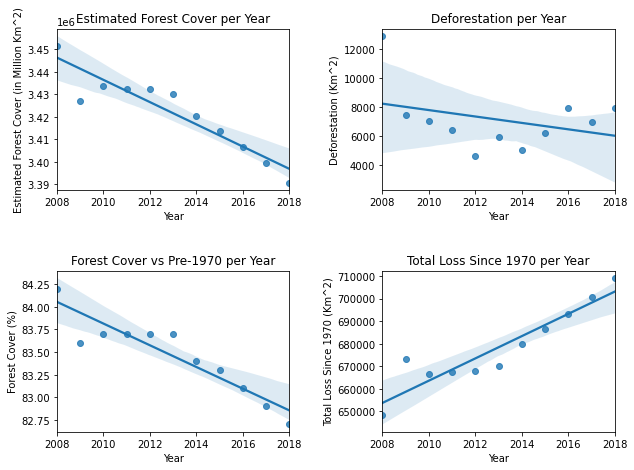

In [11]:
fig = plt.figure(figsize = (10, 7))

# Estimated Forest Cover per Year
plt.subplot(221)
plt.title("Estimated Forest Cover per Year")
sns.regplot(data = merged_table, x = "year", y = "est forest cover")
plt.xlabel('Year')
plt.ylabel("Estimated Forest Cover (in Million Km^2)")

# Deforestation per Year
plt.subplot(2,2,2)
plt.title('Deforestation per Year')
sns.regplot(data = merged_table, x = 'year', y = 'deforestation')
plt.xlabel('Year')
plt.ylabel("Deforestation (Km^2)")

# Forest Cover vs Pre-1970 per Year
plt.subplot(223)
plt.title('Forest Cover vs Pre-1970 per Year')
sns.regplot(data = merged_table, x = 'year', y = 'forest cover vs pre1970')
plt.xlabel('Year')
plt.ylabel("Forest Cover (%)")

# Total Loss Since 1970 per Year
plt.subplot(2,2,4)
plt.title('Total Loss Since 1970 per Year')
sns.regplot(data = merged_table, x = 'year', y = 'total loss since 1970')
plt.xlabel('Year')
plt.ylabel("Total Loss Since 1970 (Km^2)")

plt.subplots_adjust(left=.125, bottom=.1, right=.9, top=.9, wspace=.4, hspace=.5)

plt.show()


These plots and their regression lines now clearly display the trends of deforestation, forest cover, and loss in the Amazon.

Estimated forest cover was fairly stagnant until around 2013 where it has decreased steadily since, and the forest cover compared to pre-1970 levels mimics the same trend but displayed through percentages. While deforestation decreased until 2012, since then it has been increasing, and the total loss of the Amazon since 1970 has also increased steadily after 2012.

It is interesting to see that it is only up until recently (roughly 2012-2013) when deforestation has become more rampant, destroying the forest cover and increasing the forest loss in total. 

We can see how these graphs are related by their similar or inverse slopes. Since Forest Cover vs Pre-1970 per Year and Estimated Forest Cover per year are representing the same information, I will remove Forest Cover vs Pre-1970 per Year as a variable for our further modeling.

In [12]:
merged_table.drop(["forest cover vs pre1970"], axis = 1, inplace = True)

#### Visualizing Wikiaves Birdwatching Activity

Now that we understand our data considering the Amazon, we will now explore the data of Wikiaves users and their birdwatching activity. I will plot the four attributes related to Wikaves user activity: Birds Observed, Species Observed, Location Count, and Post Views.

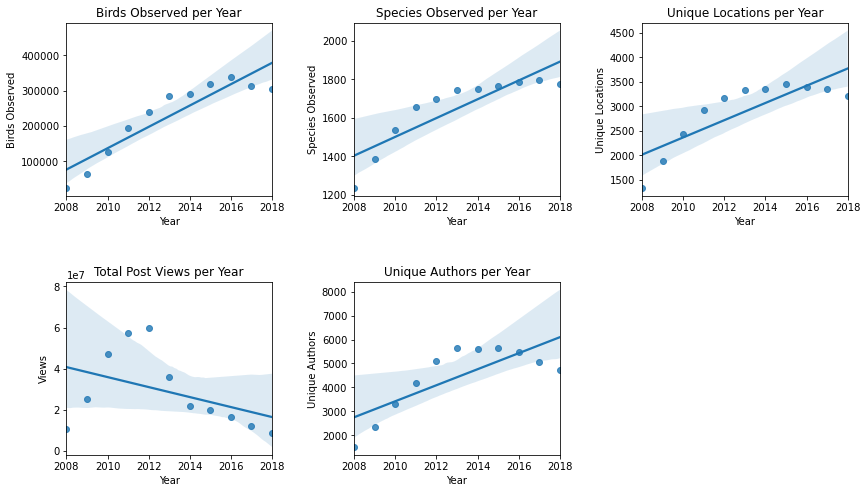

In [13]:
# Birds Observed per Year
fig = plt.figure(figsize = (14, 10))
plt.subplot(231)
plt.title("Birds Observed per Year")
sns.regplot(data = merged_table, x = "year", y = "bird observations")
plt.xlabel('Year')
plt.ylabel("Birds Observed")

# Species Observed per Year
plt.subplot(2,3,2)
plt.title('Species Observed per Year')
sns.regplot(data = merged_table, x = 'year', y = 'species count')
plt.xlabel('Year')
plt.ylabel("Species Observed")

# Location Count per Year
plt.subplot(233)
plt.title('Unique Locations per Year')
sns.regplot(data = merged_table, x = 'year', y = 'unique locations')
plt.xlabel('Year')
plt.ylabel("Unique Locations")

# Post Views per Year
plt.subplot(2,3,4)
plt.title('Total Post Views per Year')
sns.regplot(data = merged_table, x = 'year', y = 'total post views')
plt.xlabel('Year')
plt.ylabel("Views")

# Unique Authors per Year
plt.subplot(235)
plt.title('Unique Authors per Year')
sns.regplot(data = merged_table, x = 'year', y = 'unique authors')
plt.xlabel('Year')
plt.ylabel("Unique Authors")

plt.subplots_adjust(left=.125, bottom=.1, right=.9, top=.7, wspace=.4, hspace=.5)

plt.show()

Interestingly, it seems that from 2008 to 2015-2016, Birds Observed, Species Observed, and the Location Count per year have increased, although the trend becomes less convincing in 2016.

Despite the overall increase in birds and species observed along with bird diversity, the total number of people who viewed posts on Wikiaves.com had a sharp decrease in 2013 and has continuially fallen since. Looking at the number of unique posters on the site, there have been decreasing numbers since 2012, which could contribute to the drop in total views on posts. This data suggests that in recent years, there are less overall users on Wikiaves but each user posts more on average than in the past. 

#### Adjusting Variables from Results

Considering the dynamic between an increasing number of posts per year and less unique authors per year, I will create a new variable called "Avg Birds Observed per Unique Author" by dividing total bird observations over the unique authors per year, which I will explore further in this tutorial.

In [14]:
merged_table['avg birds observed per unique author'] = merged_table['bird observations']/merged_table['unique authors']

For now, plotting Average Birds Observed per Unique Author shows us the average number of posts any particular user of Wikaves has submitted per year, which can help us understand the activity of the webpage over time.

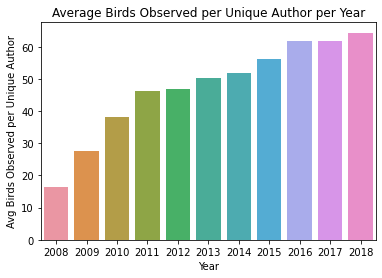

In [15]:
# Average Birds Observed per Unique Author per Year
sns.barplot(data = merged_table, x = 'year', y = 'avg birds observed per unique author')
plt.title('Average Birds Observed per Unique Author per Year')
plt.xlabel('Year')
plt.ylabel('Avg Birds Observed per Unique Author')
plt.show()

It's clear now that the average user on Wikiaves has increased their number of yearly posts over time.

#### Relationship between Deforestation and Wikiaves Activity

Vizualizing our datasets by themselves has helped us understand each better, but the main objective in this tutorial is exploring the relationship between deforestation in the Amazon and birdwatching activity on Wikiaves, which means we must put the two datasets together and see how one may or may not explain the other. Coming into this tutorial, my hypothesis was that as deforestation increased, the number of birds observed would decrease. Looking at these plots above, this doesn't seem to be the case for individual attributes, but exploring a combination of variables may help us discover relationships we did not expect.

### Model Creation and Analysis

Now that we have organized and gained an understanding of our data, it is time to enter the next step of the data science lifecycle, model creation and analysis. We will build a model that utilizes multiple of our deforestation variables to predict the number of birds observed in a given year and test its accuracy. 

#### Normalizing our Variables

Before we begin, a good practice in machine learning is standardizing or normalizing our variables depending on the models we are using, meaning we transform our variables into a format so that they can be more easily and practically compared and analyzed with each other. Considering some of our variables are in the scope of millions of km^2 and others in thousands, our machine learning models might be biased in favor of different variables simply because of their format and variance. If we tranform each variable to a range within 0 and 1 while maintaining the meaning behind each, all of the variables will be on an even playing field in our analysis. I will be normalizing all variables except year and bird observations.

Luckily, sklearn has a feature normalize in preprocessing which allows us to easily normalize our variables. If you would like to learn more about standardization and normalization please read here: (https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

Printing the first five rows shows the new normalized attributes, all spanning from 0 to 1.

In [22]:
from sklearn import preprocessing

# Selecting values for normalization
x = merged_table[['species count', 'unique locations', 'total post views', 'unique authors', 'est forest cover', 
                  'deforestation', 'total loss since 1970', 'avg birds observed per unique author']].values

# Using sklearn MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(x)

# Creating new table that has normalized values
normalized_table = pd.DataFrame(scaled_values) 
normalized_table.rename(columns = {0: 'species count', 1: 'unique locations', 2: 'total post views', 
                                   3: 'unique authors', 4: 'est forest cover', 5: 'deforestation', 
                                   6: 'total loss since 1970', 7: 'avg birds observed per unique author'}, inplace = True)
normalized_table.insert(loc = 0, column = 'year', value = merged_table['year'])
normalized_table.insert(loc = 9, column = 'bird observations', value = merged_table['bird observations'])

normalized_table.head()

,year,species count,unique locations,total post views,unique authors,est forest cover,deforestation,total loss since 1970,avg birds observed per unique author,bird observations
0,2008,0.000000,0.000000,0.037646,0.000000,1.000000,1.000000,0.000000,0.000000,24673
1,2009,0.262970,0.256981,0.329027,0.205443,0.592969,0.346882,0.407031,0.231942,64958
2,2010,0.534884,0.513961,0.753057,0.434489,0.702849,0.291247,0.297151,0.457492,127033
3,2011,0.747764,0.752485,0.949254,0.646917,0.685180,0.221463,0.314820,0.623469,194321
4,2012,0.824687,0.862281,1.000000,0.866570,0.680636,0.000000,0.319364,0.637337,239962


#### Choosing Predictor Variables

Our goal when using our Machine Learning models will be understand if Brazilian Amazon deforestation is related to total bird observations on Wikiaves.com.

The Prediction Variables (X) are:

Estimated Forest Cover,
Deforestation,
Total Loss Since 1970

The Predicted Variable (y) is:

Bird Observations

In [23]:
# Selecting variables for prediction and to be predicted
X = normalized_table[['est forest cover', 'deforestation', 'total loss since 1970']]
y = normalized_table[['bird observations']]

#### Choosing our Models

Now that our data is normalized, we are ready to start the machine learning process, which begins by choosing our models. As we have numerical continuous variables, we should use models that have the ability to work with continuous data. All models with a few exceptions are applicable to both, but my personal favorites are Linear Regression, Random Forests and Gradient Descent. We can use all three and then compare the results to see which work the best and if they are meaningful.

#### Splitting our Data

To test how our model performs, we need to split our data into a training set and a testing set. We will run our model on the training set and then test our model on the testing set which the model has never seen before, and see how well the predicted values compare to the actual values.

Sklearn has a built in feature called train_test_split which we can import and use. 70% of the data will be used for training, and 30% of the data will be used to test the result.

Note that the train_test_split function randomly chooses which data will be reserved for the training and testing datasets. For this reason, the results of our Machine Learning models will have varying results depending on how our data is split.

In [17]:
from sklearn.model_selection import train_test_split

# Creating training and testing sets with train_test_split (70% for training, 30% for testing)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3)

#### Using our Models

Now that our data is split into training and testing sets, we can use our three Machine Learning models which are all built into sklearn.

In [178]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from scipy.stats import ttest_ind
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

I will be using sklearn's LinearRegression function to train and test the data followed by RandomForestRegressor and SGDRegressor. These models will fit the training data to predict bird observation values of the x test data we reserved from the total dataset. We can obtain a score from the regressor which is it's r squared value (how much variation is explained by our model). We then will perform a sample t test to understand how much our model actually fit the true data.

#### Multiple Linear Regression

Multiple Linear Regression is an extension of Linear Regression which uses several explanatory variables. This technique estimates the relationship between multiple independent variables to reach a numerical conclusion of the dependent variable, in this case, Birds Observed.

Learn more about Multiple Linear Regression here: https://www.scribbr.com/statistics/multiple-linear-regression/

In [185]:
# Linear Regression
lrg = LinearRegression()
lrg.fit(x_train, y_train) # Fit the training data
lrg_ypred = lrg.predict(x_test) # Predict bird observations for x_test
t, p = ttest_ind(y_test, lrg_ypred, equal_var = False) # Sklearn sample t test
print("| Linear Regression:")
print("|")
print("| R Squared: ", lrg.score(x_test, y_test))
print("| Mean Squared Error: ", metrics.mean_squared_error(y_test, lrg_ypred)) # Metrics MSE calculation
print("| T value: ", t)
print("| P Value: ", p)

| Linear Regression:
|
| R Squared:  0.3530148224049028
| Mean Squared Error:  12191281030.2
| T value:  [0.40182162]
| P Value:  [0.69899475]


Our Linear Regression model calculated an R Squared of 0.353 and a large mean squared error, meaning that our model does not explain the variance of the data well. The P Value of 0.699 indicates that we would fail to reject the null hypothesis of equal mean between our predicted and actual values.

#### Random Forest Regression

The Random Forest Regression model works by constructing many random decision trees on small samples of the overall data which individually make a prediction. Each of these decision trees are are highly specific to these samples, but the model works by taking the mean prediction to estimate the most reasonable prediction.

Learn more about Random Forest Regression here: https://medium.com/swlh/random-forest-and-its-implementation-71824ced454f

In [186]:
# Random Forest Regression
rfr = RandomForestRegressor(n_estimators = 500) # 500 decision trees
rfr.fit(x_train, y_train.values.ravel()) # Fit the training data
rfr_ypred = rfr.predict(x_test)
t, p = ttest_ind(y_test, rfr_ypred, equal_var = False)
print("| Random Forests")
print("|")
print("| R Squared: ", rfr.score(x_test, np.ravel(y_test)))
print("| Mean Squared Error: ", metrics.mean_squared_error(y_test, rfr_ypred)) # Metrics MSE calculation
print("| T Value: ", t)
print("| P Value: ", p)
print()

| Random Forests
|
| R Squared:  0.3324797851756117
| Mean Squared Error:  12578227158.948227
| T Value:  [-0.57666702]
| P Value:  [0.58944592]



The Random Forest model calculated a similar R Squared value of 0.333 and has a large MSE. The P value also indicates that we would fail to reject the null hypothesis of equal mean between our predicted and actual values.

#### Stochastic Gradient Descent Regression

The Gradient Descent Regression model is an iterative algorithm which in each run attempts to reduce the error between the the actual y value and the predicted y value. It does this using a gradient (which with one variable is the slope) of our prediction equation. Stochastic Gradient Descent means this algorithm is run on random data points from our data set on each iteration to make the process more efficient.

Learn more about Stochastic Gradient Descent here: https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31

In [187]:
# Stochastic Gradient Descent Regression
reg = SGDRegressor(max_iter = 7000) # Using 7000 iterations 
reg.fit(x_train, np.ravel(y_train)) # Fitting training data
reg_ypred = reg.predict(x_test) # Sklearn sample t test
t, p = ttest_ind(y_test, reg_ypred, equal_var = False) # Sklearn t test between y's
print("| Stochastic Gradient Descent: ")
print("|")
print("| R Squared: ", reg.score(x_test, np.ravel(y_test)))
print("| Mean Squared Error: ", metrics.mean_squared_error(y_test, reg_ypred)) # Metrics MSE calculation
print("| T Value: ", t)
print("| P Value: ", p)

| Stochastic Gradient Descent: 
|
| R Squared:  0.6392131044124635
| Mean Squared Error:  6798385169.302546
| T Value:  [-0.18855047]
| P Value:  [0.85643161]


The Stochastic Gradient Descent model derived an R Squared value of 0.639, meaning that our model explains approximately 63.9% of the data. While this is better than the values previously observed, the P value of 0.85 also indicates that we would fail to reject the null hypothesis of equal mean between our predicted and actual values.

### Results

We can display our outputs visually through bar graphs using seaborn's catplot function.

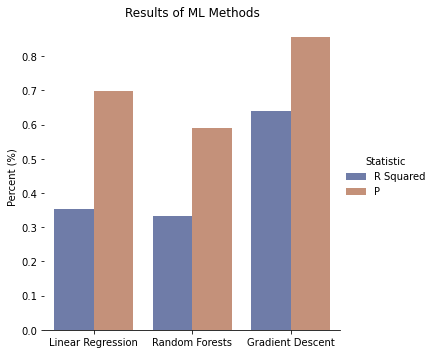

In [208]:
# Creating DataFrame with results to graph
results = pd.DataFrame()
results['Percent'] = [0.353, 0.333, 0.639, .699, .589, .856]
results['Method'] = ['Linear Regression', 'Random Forests', 'Gradient Descent', 
                     'Linear Regression', 'Random Forests', 'Gradient Descent']
results['Statistic'] = ['R Squared', 'R Squared', 'R Squared', 'P', 'P', 'P']

# Using seaborn catplot to plot results
plot = sns.catplot(
    data = results, kind = "bar", x = 'Method', y = 'Percent', 
    hue = 'Statistic', palette = 'dark', alpha = .6, height = 5)
plot.despine(left = True)
plot.set_axis_labels("", "Percent (%)")
plt.title("Results of ML Methods")
plt.show()

#### Relatively low R Squared values paired with high P values designates an overall result to fail to reject the null hypothesis of equal mean between our predicted and actual values, and suggests little to no correlation between deforestation in the Amazon and bird observations posted on Wikiaves.com.

### Conclusion



The final step in the data science lifecycle is drawing conclusions from the analysis on our original data. As our results displayed, the machine learning analysis resulted in low R squared values and our sample T tests resulted in high P values, suggesting no meaningful correlation between Brazilian Amazon Rainforest deforestation and Wikiaves birdwatching observations. This conclusion rejects my initial hypothesis.

#### Insights

While visualizing the data, I noticed that over time, Wikiaves bird observations have generally increased. Despite this, from 2014 to 2018, the number of unique posters actually decreased. My suspicions are that the number of observations being posted on Wikiaves could be more impacted by dedicated users who tend to post often as a part of the birdwatching community, despite any deforestation activity happening in the Amazon Rainforest. If anything, it could be the case that as these bird species become more endangered, dedicated birdwatchers have even more reason to search for them while they have the chance. 

Plotting the average birds observed for each unique author against bird observations per year could give us some indication if these ideas are related.

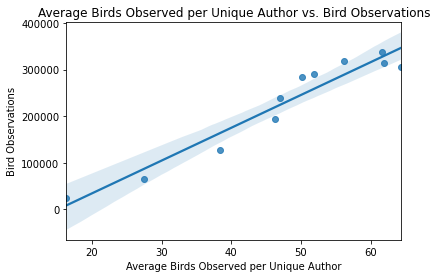

In [24]:
# Average Birds Observed per Unique Author vs Bird Observations
sns.regplot(data = merged_table, x = 'avg birds observed per unique author', y = 'bird observations')
plt.title('Average Birds Observed per Unique Author vs. Bird Observations')
plt.xlabel('Average Birds Observed per Unique Author')
plt.ylabel('Bird Observations')
plt.show()

The positive slope on this regression line suggests there is a fairly strong linear relationship between the average amounts of posts per user and the number of total bird observations, despite the overall user base decreasing in numbers over time. As the average user has posted more frequently on Wikiaves.com, the total observations have increased.

#### Learn more about Data Science

Thank you for reading this tutorial and I hope it was an informative introduction to the Data Science lifecycle. If you would like to learn more, please read here: https://towardsdatascience.com/intro-to-data-science-531079c38b22